# Personal metrics
Grayson Ricketts

July 2019 - April 2020

---


## Questions
* [x] How many hours am I working?
* [x] What are the daily averages for ...?
    * Sleep
    * Caffeine
    * Hours of sleep
    * Caffeine
    * Good days
* [x] What is correlated with having a good day?
* [x] How much am I working on the week-ends? (note: I log the time I spend on personal projects in "hours_worked")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
metrics_file_name = './data/daily-metrics-july-2019-april-2020.tsv'
df = pd.read_csv(metrics_file_name, sep="\t")

In [50]:
# Drop columsn related to eating since never consistently entered data for this
df = df.drop(columns=['ate_reasonably', 'breakfast'])

# Drop AM and PM because according to previous analysis no noticeable difference
# between AM and PM. Going to look at daily instead (e.g. (AM+PM)/2 ).
df = df.drop(columns=['am_progress','am_quality','am_mood','am_stress','am_motivation','am_focus','am_hunger','am_contact_switching'])
df = df.drop(columns=['pm_progress','pm_quality','pm_mood','pm_stress','pm_motivation','pm_focus','pm_hunger','pm_contact_switching'])

In [51]:
# Clean
is_string = df.select_dtypes(['object'])
df[is_string.columns] = is_string.apply(lambda x: x.str.strip())

In [53]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [54]:
# Convert strings to numbers
for x in ['hours_worked']:
    df[x] = pd.to_numeric(df[x])

In [55]:
# Sleep quality and anxiety was measured with the values "very bad", "bad", 
# "okay", "good", and "very good" in the spreadsheet. In the df they'll 
# be converted to numbers for easier analysis.
def convert_to_number(x):
    if x == 'very bad':
        return 1
    elif x == 'bad':
        return 2
    elif x == 'okay':
        return 3
    elif x == 'good':
        return 4
    elif x == 'very good':
        return 5
    
    return np.nan
for x in ['sleep_quality', 'anxiety']:
    df[x] = df[x].apply(lambda v : convert_to_number(v))

In [56]:
# Energy at the start of the day was measured with the values "1-Very Bad", "2-Bad", 
# "3-Okay", "4-Good", and "5-Very good" in the spreadsheet. In the df they'll 
# be converted to numbers for easier analysis.
df['energy_at_start'] = df['energy_at_start'].apply(lambda x: np.nan if pd.isnull(x) else int(x[0]))

In [57]:
# Dropping nterruptions and tasks since they're measurement has
# least integrity to me.
df = df.drop(columns=['interruptions', 'tasks'])

In [58]:
# Dropping meetings since they are inevitable and my
# measurement  is impercise (i.e. none, few, many, 
# constant). If I were to do again I would 
# do by minutes per day.
df = df.drop(columns='meeetings')

In [59]:
df.dtypes

date               datetime64[ns]
good_day                     bool
weekend                      bool
caffeine                  float64
hours_worked              float64
sick_day                     bool
vacation                     bool
hrs_of_sleep              float64
sleep_quality             float64
anxiety                   float64
energy_at_start           float64
prod_support                 bool
progress                  float64
quality                   float64
mood                      float64
stress                    float64
motivation                float64
focus                     float64
dtype: object

In [60]:
df.shape

(255, 18)

In [93]:
# Gets only days I was working
work_df = df[(df['weekend'] == False) & (df['vacation'] == False) & (df['sick_day'] == False)]

# Drops the weekend column since no longer needed
work_df = work_df.drop(columns=['weekend', 'vacation', 'sick_day'])

In [94]:
work_df.shape

(182, 15)

In [95]:
work_df.describe()

,caffeine,hours_worked,hrs_of_sleep,sleep_quality,anxiety,energy_at_start,progress,quality,mood,stress,motivation,focus
count,176.000000,179.000000,171.000000,171.000000,171.000000,139.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,156.789773,8.248603,8.383041,3.771930,4.000000,3.539568,2.989011,3.486264,2.942308,2.983516,2.442308,2.189560
std,98.517909,0.970961,1.259460,1.063029,0.840168,0.861968,1.602791,1.231976,1.581391,1.890585,1.736263,1.824042
min,0.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,8.000000,8.000000,3.000000,4.000000,3.000000,2.125000,3.125000,2.000000,1.500000,0.000000,0.000000
50%,150.000000,8.000000,8.500000,4.000000,4.000000,4.000000,3.500000,4.000000,3.500000,4.000000,3.000000,2.500000
75%,225.000000,8.500000,9.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.500000,4.000000,4.000000
max,420.000000,12.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [96]:
average_hours_worked = work_df['hours_worked'].mean()
print('Average hours on a weekday: {0}'.format(round(average_hours_worked, 2)))

Average hours on a weekday: 8.25


Daily averages
	progress: 3.62 / 5 (150 days tracked)
	quality: 3.79 / 5 (167 days tracked)
	mood: 3.63 / 5 (147 days tracked)
	stress: 3.96 / 5 (137 days tracked)
	motivation: 3.45 / 5 (128 days tracked)
	focus: 3.51 / 5 (113 days tracked)


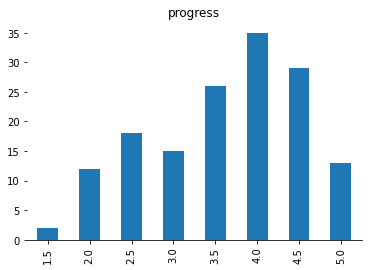

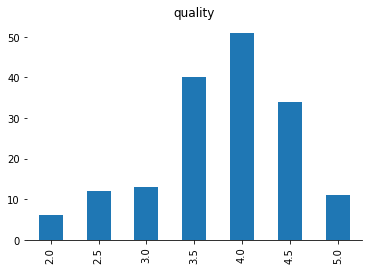

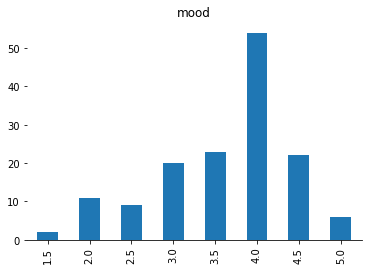

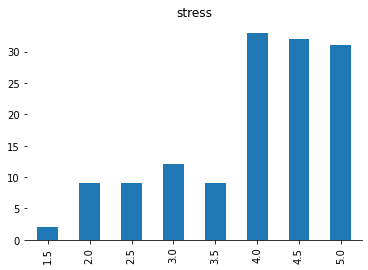

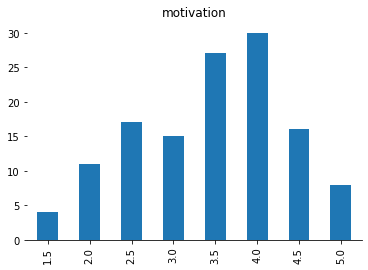

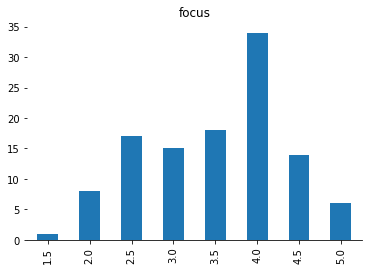

In [143]:
n = 0
metrics = ['progress','quality', 'mood', 'stress', 'motivation', 'focus']

print('Daily averages')
for metric in metrics:
    # Setup plotting
    plt.figure(n)
    n = n + 1
    
    # Metrics that are 0 weren't filled in either becuase I did not enter values
    # for that day. Most likely this was because I had not started tracking that
    # metric yet.
    metric_series = work_df[metric][work_df[metric] > 1]
    
    # Print average
    avg = metric_series.mean()
    print('\t{0}: {1} / 5 ({2} days tracked)'.format(metric, round(avg, 2), metric_series.size))

    # Plot histogram
#     ax = metric_series.plot.hist(bins=[1,2,3,4,5])
    ax = metric_series.value_counts().sort_index().plot.bar()
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(metric)

In [105]:
corr = work_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,good_day,caffeine,hours_worked,hrs_of_sleep,sleep_quality,anxiety,energy_at_start,prod_support,progress,quality,mood,stress,motivation,focus
good_day,1.00,-0.38,-0.05,0.10,0.09,0.18,0.13,0.04,0.29,0.06,0.29,0.31,0.44,0.50
caffeine,-0.38,1.00,0.20,-0.16,-0.18,-0.20,0.11,-0.06,-0.00,0.06,-0.07,-0.28,-0.27,-0.48
hours_worked,-0.05,0.20,1.00,0.05,-0.03,0.04,0.26,0.10,0.23,0.21,0.14,-0.04,0.10,0.05
hrs_of_sleep,0.10,-0.16,0.05,1.00,0.18,0.16,0.01,0.07,0.18,0.16,0.22,0.28,0.16,0.17
sleep_quality,0.09,-0.18,-0.03,0.18,1.00,0.32,0.15,0.03,0.05,0.04,0.15,0.17,0.16,0.20
anxiety,0.18,-0.20,0.04,0.16,0.32,1.00,0.23,-0.06,0.10,0.11,0.20,0.26,0.27,0.29
energy_at_start,0.13,0.11,0.26,0.01,0.15,0.23,1.00,0.02,0.16,0.10,0.30,0.09,0.24,0.17
prod_support,0.04,-0.06,0.10,0.07,0.03,-0.06,0.02,1.00,-0.10,-0.31,-0.13,-0.11,-0.06,-0.09
progress,0.29,-0.00,0.23,0.18,0.05,0.10,0.16,-0.10,1.00,0.71,0.88,0.69,0.74,0.64
quality,0.06,0.06,0.21,0.16,0.04,0.11,0.10,-0.31,0.71,1.00,0.70,0.60,0.58,0.54


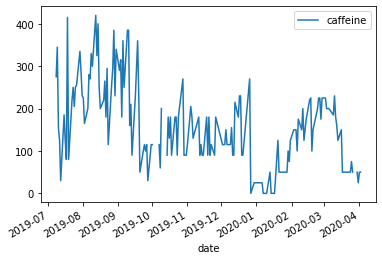

In [106]:
work_df.plot(x='date', y='caffeine')

In [108]:
def get_corr_gt(data, threshold=0.5):
    relations = []
    completed = []
    for x in data.columns:
        for y in data.columns:
            completed.append(x)
            
            if x == y:
                continue
            if abs(data[x][y]) < threshold:
                continue
            if y in completed:
                continue
                
            relations.append('{0}-{1} ({2})'.format(x, y, round(data[x][y],2)))
    return relations

In [127]:
print('Correlations > 0.75')
for x in get_corr_gt(corr, 0.75):
    print(x)

Correlations > 0.75
progress-mood (0.88)
mood-stress (0.8)
mood-motivation (0.75)
stress-motivation (0.82)
motivation-focus (0.81)


In [43]:
# Considered also not including prod support weekends but
# I ended up doing so little work for prod support 
# on those weekends it seems unnecessary. (Prod support
# is our team's manual support for our application where
# an engineer is on call to support and fix any issues
# that come up)
weekends_df = df[(df['weekend'] == True)]

In [44]:
weekends_df['hours_worked'].mean()

3.25

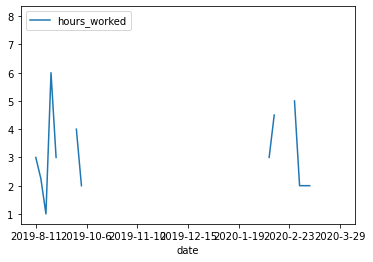

In [112]:
weekends_df.plot(x='date', y='hours_worked')

In [144]:
weekends_df['hours_worked']value_counts().sort_index().plot.bar()

SyntaxError: invalid syntax (<ipython-input-144-6da5e0f8e509>, line 1)

In [122]:
days_worked = weekends_df['hours_worked'].dropna().size
print('Weekend days worked: {0}'.format(days_worked))

Weekend days worked: 23


In [125]:
percent_worked = (days_worked / weekends_df.shape[0]) * 100
print('Percent of weekend days worked: {0}%'.format(round(percent_worked,1)))

Percent of weekend days worked: 37.7%
